<div style="background-color:#004d99; color:white; padding:30px; border-radius:10px; text-align:center;">
  <h1 style="margin:0; font-size:2.8em;">Sales Analysis of Global Superstore DRAFT 1</h1>
  <p style="font-size:1.2em;">Objective: Analyze the sales performance of Global Superstore to identify trends and insights that can inform business decisions.</p>
</div>

<div  style="background-color:pink; padding:20px; text-align:left; border-radius:10px;">
<b>Tasks:</b>
<P><b>1. Data Cleaning and Preparation:</b></br>
Load the dataset into your analysis tool of choice (Python).
Check for and handle missing or duplicate data.
Ensure data types are appropriate for analysis.
</P>
<p><b>2. Descriptive Statistics:</b></br>
Calculate summary statistics for numerical columns (e.g., mean, median, standard deviation of Sales
and Profit).
Determine the distribution of categorical variables (e.g., count of orders by Region, Category).
</p>
<p><b>3.Data visualisations</b></br>
Create visualizations to represent sales trends over time.
Develop bar charts to show sales and profit by Category and Sub-Category.
Use geographical maps to display sales performance across different regions and states.
</p>
<p><b>4. Customer Analysis:</b></br>
Identify the top 10 customers based on total sales.
Analyze purchasing patterns across different customer segments.
</p>
<p><b>5. Product Performance:</b></br>
Determine which products are the best and worst sellers.
Analyze the impact of discounts on sales and profitability.
</p>
<p><b>6. Shipping Analysis:</b></br>
Evaluate the delivery time by calculating the difference between Order Date and Ship Date.
Analyze how Ship Mode affects delivery time and customer satisfaction.
</p>

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [170]:
df=pd.read_csv("PR1_DATA.csv")
print("shape of dataframe is:",df.shape)
df[:4]

shape of dataframe is: (1000, 24)


Row ID                  Order ID  Order Date   Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014   First Class   
1   26341    IN-2014-JR162107-41675    2/5/2014    2/7/2014  Second Class   
2   25330    IN-2014-CR127307-41929  10/17/2014  10/18/2014   First Class   
3   13524   ES-2014-KM1637548-41667   1/28/2014   1/30/2014   First Class   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH-5816  Technology       Phones   
1  ...  FUR-CH-5379   Furniture       Chairs   
2  ...  TEC-PH-5356  Technology       Phones   
3  ...  TEC-PH-5267  Technology       Phones   

                                Product Name    Sales Quantity Discount  \
0                           Samsung Convoy 3   221.98        2      0.0   
1  Novimex Executive Leather Armchair, Black  3709.40        9      0.1   
2          Nokia Smart Phone, with Caller ID  5175.17        9      0.1   
3             Motorola Smart Phone, Cordless  2892.51        5      0.1   

   Profit  Shipping Cost  Order Priority  
0   62.15          40.77            High  
1 -288.77         923.63        Critical  
2  919.97         915.49          Medium  
3  -96.54         910.16          Medium  

[4 rows x 24 columns]

In [171]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

None

## <span style="color:orange;"><h4>Q1.CLEAN THE DATA</h4></u></span>

In [173]:
df.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

In [174]:
#postal code is the only column with null values and also a very high number of them hence i have dropped it
df.drop(columns=["Postal Code"], inplace=True)

In [175]:
#FIND THE NUMBER OF DUPLICATES IN THE DATASET
df.duplicated().sum()

0

In [176]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

## <span style="color:red;"><h5>Q1b.ENSURE DATE IS IN THE RIGHT FORMAT AND ADD COLUM FOR MONTH & YEARMONTH </h5></u></span>

In [178]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Ship Date"]=pd.to_datetime(df["Ship Date"])
#get year and month of Order_Date
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)
# Extract month
df['Month'] = df['Order Date'].dt.month

## <span style="color:orange;"><h4>Q2.DESCRIPTIVE STATISTICS</h4></u></span>

In [180]:
display(df.describe())

Row ID                  Order Date  \
count   1000.000000                        1000   
mean   25079.328000  2014-05-30 00:56:09.600000   
min       58.000000         2012-01-08 00:00:00   
25%    15118.750000         2013-06-25 00:00:00   
50%    25084.500000         2014-07-25 12:00:00   
75%    34524.000000         2015-06-10 00:00:00   
max    51284.000000         2015-12-31 00:00:00   
std    12897.726632                         NaN   

                           Ship Date        Sales    Quantity     Discount  \
count                           1000  1000.000000  1000.00000  1000.000000   
mean   2014-06-02 01:29:16.799999744  1710.971470     5.55800     0.092840   
min              2012-01-11 00:00:00     1.910000     1.00000     0.000000   
25%              2013-07-01 00:00:00   826.907500     4.00000     0.000000   
50%              2014-07-30 00:00:00  1585.115000     5.00000     0.000000   
75%              2015-06-12 00:00:00  2477.812500     7.00000     0.150000   
max              2016-01-03 00:00:00  9892.740000    14.00000     0.800000   
std                              NaN  1259.239238     2.71846     0.148666   

            Profit  Shipping Cost        Month  
count  1000.000000    1000.000000  1000.000000  
mean    288.920440     272.384897     7.562000  
min   -3059.820000       1.070000     1.000000  
25%      10.037500     209.827500     5.000000  
50%     190.685000     258.897500     8.000000  
75%     518.872500     351.070250    11.000000  
max    4946.370000     923.630000    12.000000  
std     574.504782     176.160716     3.377805

## <span style="color:orange;"><h4>Q3.ORDERS BY REGION</h4></u></span>

In [182]:
pd.crosstab(df['Region'], df['Category'], margins=True)

Category           Furniture  Office Supplies  Technology   All
Region                                                         
Canada                     0                6           0     6
Caribbean                  7                6           6    19
Central Africa             5                2           7    14
Central America           27               12          38    77
Central US                 6               32           8    46
Eastern Africa             2                3           4     9
Eastern Asia              37               13          40    90
Eastern Europe            11                3           9    23
Eastern US                12               40           8    60
North Africa               2                3           7    12
Northern Europe           15                9          24    48
Oceania                   41               15          44   100
South America             18                7          12    37
Southeastern Asia         28               17          25    70
Southern Africa            3                2           6    11
Southern Asia             33               12          42    87
Southern Europe           12               16          18    46
Southern US                5               18           3    26
Western Africa             1                1           6     8
Western Asia               6                1          11    18
Western Europe            42               25          64   131
Western US                13               36          13    62
All                      326              279         395  1000

In [202]:
m=grouped_data['Profit'].agg(function)
m

min     max    mean         std
Country     Category        Sub-Category                                    
Afghanistan Furniture       Tables        647.55  647.55  647.55         NaN
Albania     Technology      Machines      258.90  258.90  258.90         NaN
                            Phones         22.08   22.08   22.08         NaN
Algeria     Technology      Machines      202.32  202.32  202.32         NaN
Angola      Furniture       Bookcases      49.50   49.50   49.50         NaN
...                                          ...     ...     ...         ...
Uruguay     Furniture       Chairs        868.12  868.12  868.12         NaN
Vietnam     Furniture       Chairs        117.66  368.26  242.96  177.200959
            Office Supplies Appliances    316.70  316.70  316.70         NaN
            Technology      Copiers      -147.52 -147.52 -147.52         NaN
Zambia      Furniture       Tables        682.92  682.92  682.92         NaN

[297 rows x 4 columns]

In [183]:
plot1=df.groupby('Category')['Sales'].sum().reset_index()

px.bar(plot1, x='Category', y='Sales', color='Category', width=1000, height=800)

## <span style="color:orange;"><h4>Q3b.Visualize</h4></u></span>

<Axes: xlabel='YearMonth'>

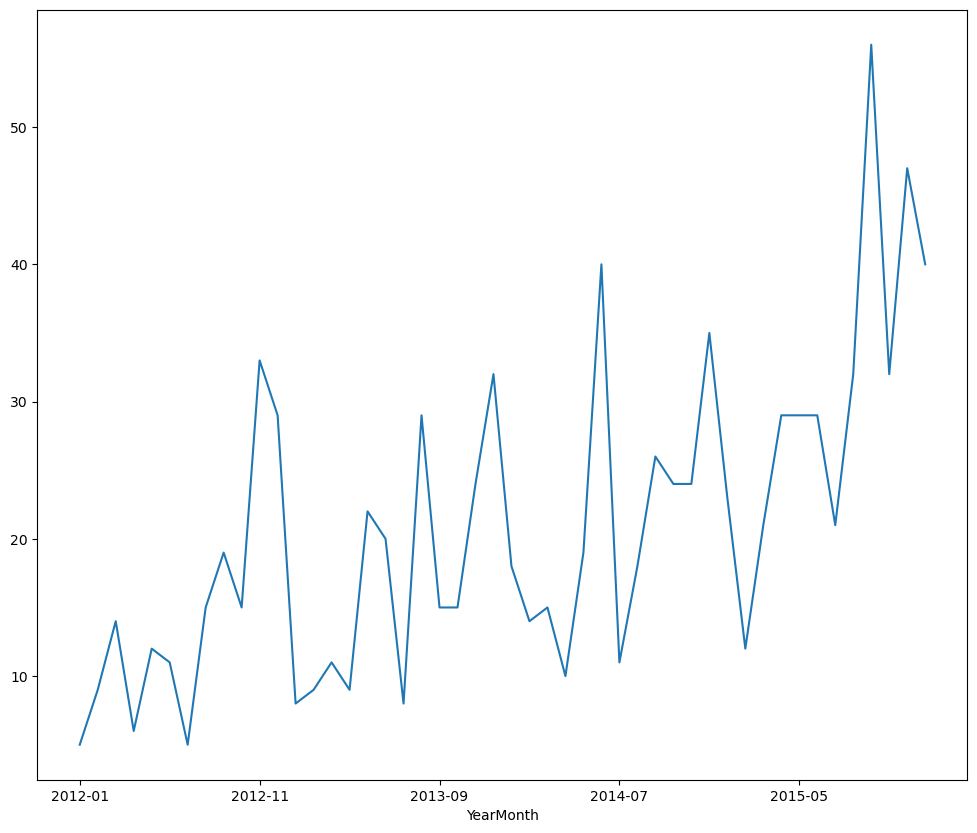

In [196]:
#visualize sales trend over time
plt.figure(figsize=(12,10))
df.groupby('YearMonth')['Sales'].count().plot(kind='line')

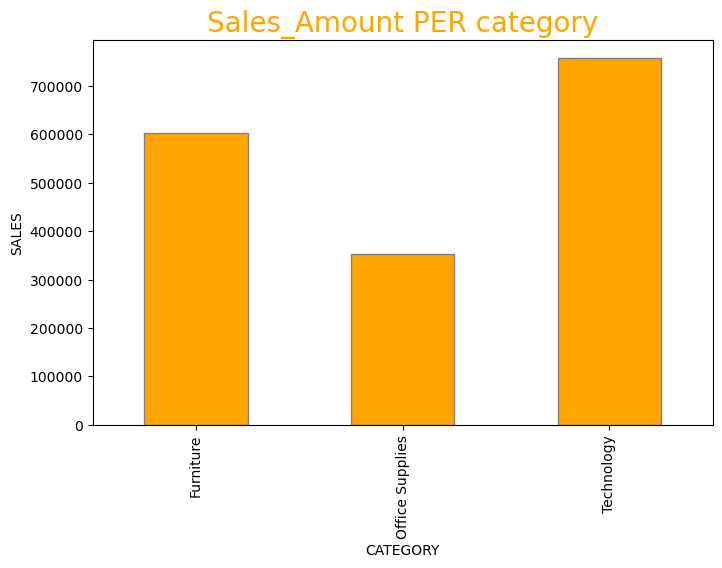

In [25]:
#Sales_Amount PER category
plt.figure(figsize=(8, 5))
df.groupby("Category")["Sales"].sum().plot(kind="bar", color="orange", edgecolor="grey")
plt.title("Sales_Amount PER category", fontsize=20, color='orange')
plt.xlabel('CATEGORY')
plt.ylabel('SALES')
plt.show()

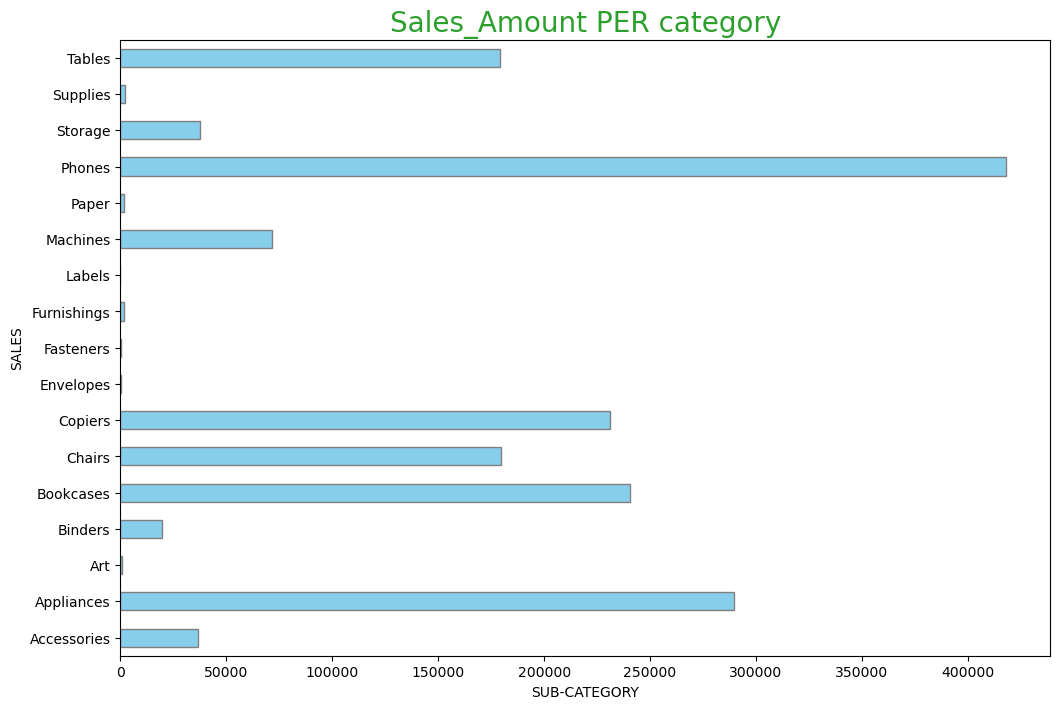

In [26]:
#sales amount per SubCategory
plt.figure(figsize=(12, 8))
df.groupby('Sub-Category')['Sales'].sum().plot(kind='barh', color="skyblue", edgecolor="grey")
plt.title("Sales_Amount PER category", fontsize=20, color='C2')
plt.xlabel('SUB-CATEGORY')
plt.ylabel('SALES')
plt.show()

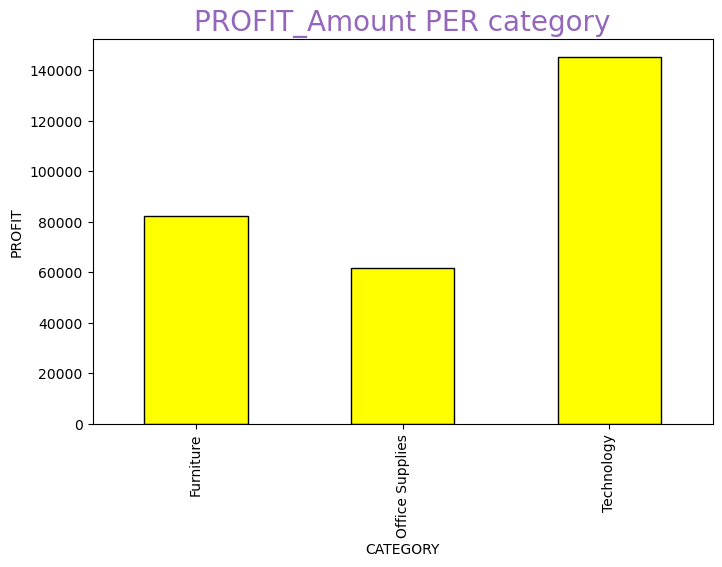

In [27]:
#profit_Amount PER Category
plt.figure(figsize=(8, 5))
df.groupby("Category")["Profit"].sum().plot(kind="bar", color="yellow", edgecolor="black")
plt.title("PROFIT_Amount PER category",fontsize=20, color='C4')
plt.xlabel('CATEGORY')
plt.ylabel('PROFIT')
plt.show()

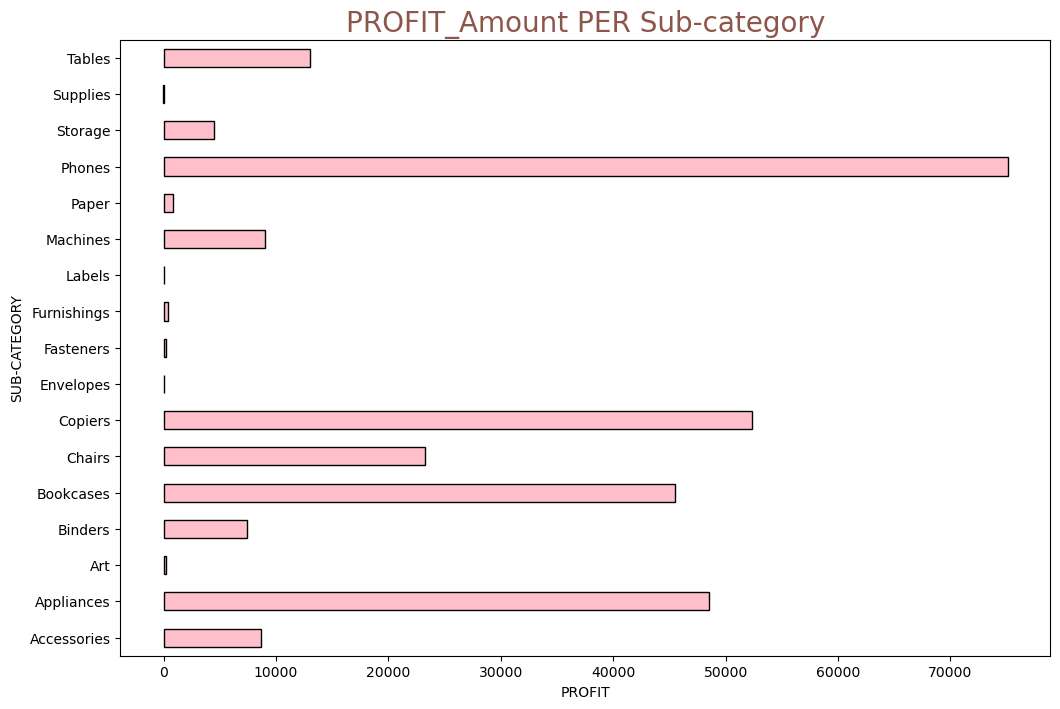

In [28]:
#profit_Amount PER sub-category
plt.figure(figsize=(12,8))
df.groupby("Sub-Category")["Profit"].sum().plot(kind="barh", color="pink", edgecolor="black")
plt.title("PROFIT_Amount PER Sub-category", fontsize=20, color='C5')
plt.xlabel('PROFIT')
plt.ylabel('SUB-CATEGORY')
plt.show()

## <span style="color:orange;"><h4>Q4.Customer analysis</h4></u></span>

In [200]:
#Top 10 Customers by Sales
df.groupby('Customer Name')['Sales'].sum().nlargest(10)

Customer Name
Adrian Barton      17307.24
Dave Poirier       12871.07
Vivek Grady        12800.38
Adam Bellavance    11465.85
Fred Hopkins       11294.06
Dave Brooks        10705.87
John Huston        10565.05
Brad Norvell       10367.92
Anne McFarland      9904.74
Susan Pistek        9548.94
Name: Sales, dtype: float64

In [31]:
#Segment Analysis- look into total sales per each segment
df.groupby('Segment')['Sales'].sum()

Segment
Consumer       873512.42
Corporate      524287.05
Home Office    313172.00
Name: Sales, dtype: float64

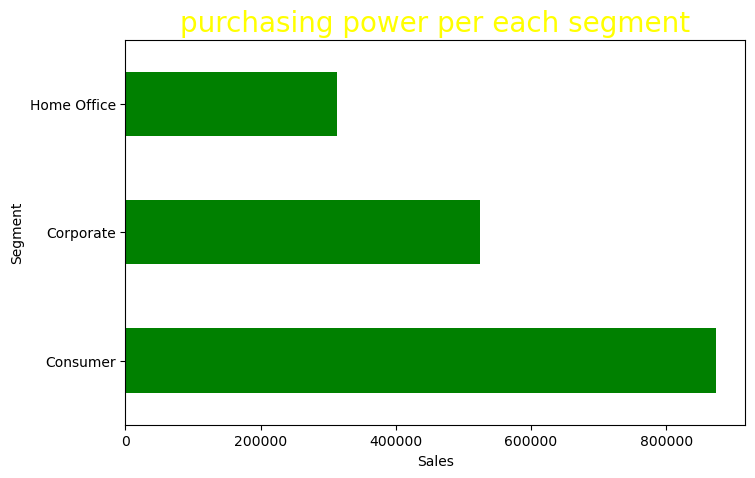

In [32]:
#Segment Analysis2- look into purchasing power per each segment
plt.figure(figsize=(8, 5))
df.groupby('Segment')['Sales'].sum().plot(kind='barh', color='green')
plt.title("purchasing power per each segment",fontsize=20, color='yellow')
plt.xlabel('Sales')
plt.ylabel('Segment')
plt.show()

#### FOR THE PLOTS BELOW AM USING 2 PLOTS SINCE THE CUSTOMER ARE TOO MANY

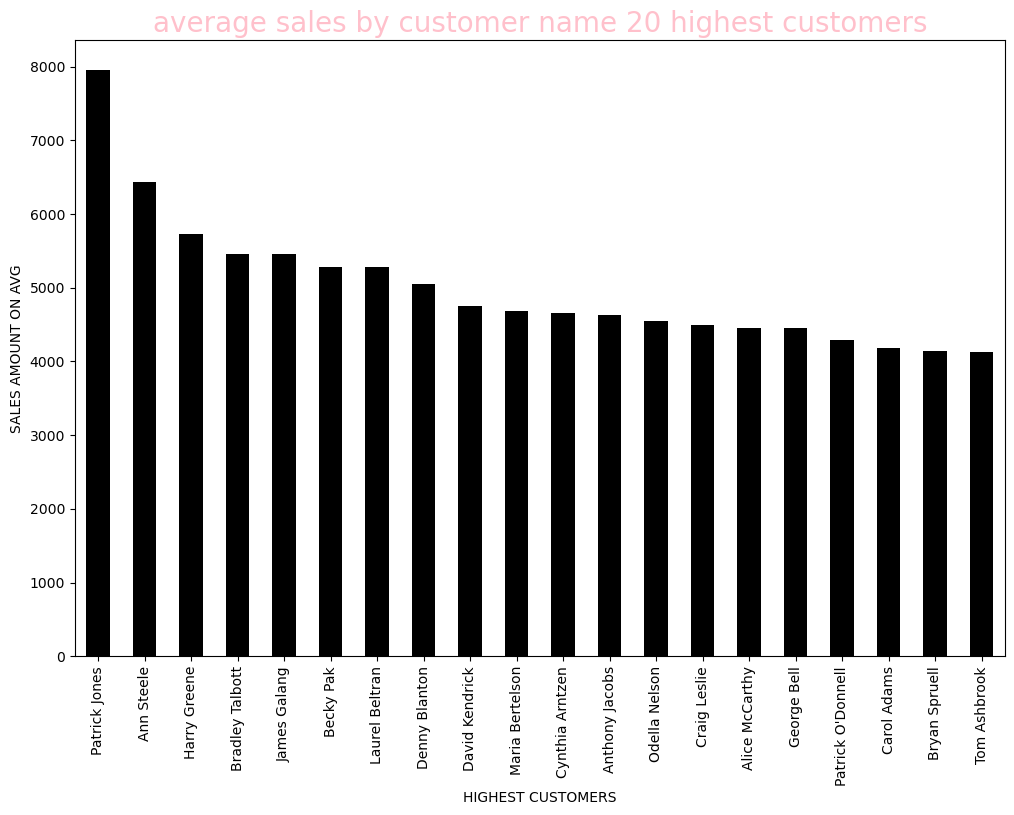

In [34]:
#average sales by customer name 20 highest customers & 20 lowest
plt.figure(figsize=(12,8))
h1=df.groupby("Customer Name")["Sales"].mean().nlargest(20).plot(kind="bar", color="black")
plt.title('average sales by customer name 20 highest customers',fontsize=20, color='pink')
plt.xlabel('HIGHEST CUSTOMERS')
plt.ylabel('SALES AMOUNT ON AVG')
plt.show()

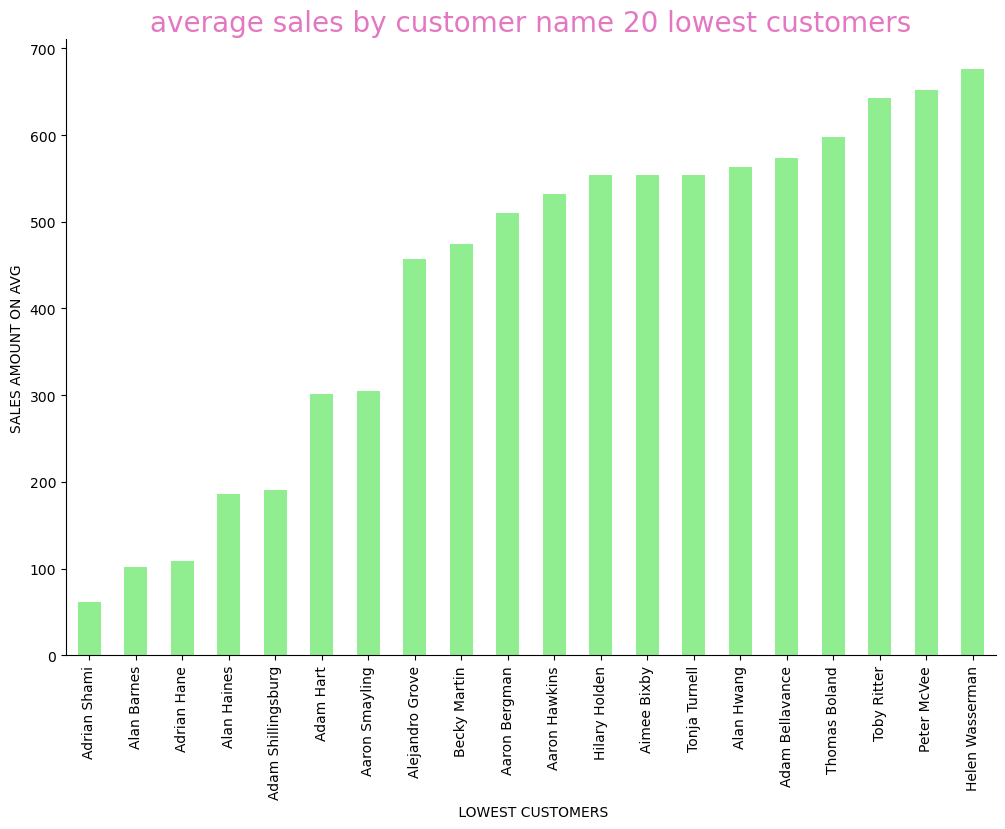

In [35]:
plt.figure(figsize=(12,8))
l1=df.groupby("Customer Name")["Sales"].mean().nsmallest(20).plot(kind="bar", color="lightgreen")
plt.title('average sales by customer name 20 lowest customers',fontsize=20, color='C66')
plt.xlabel(' LOWEST CUSTOMERS')
plt.ylabel('SALES AMOUNT ON AVG')
sns.despine()
plt.show()

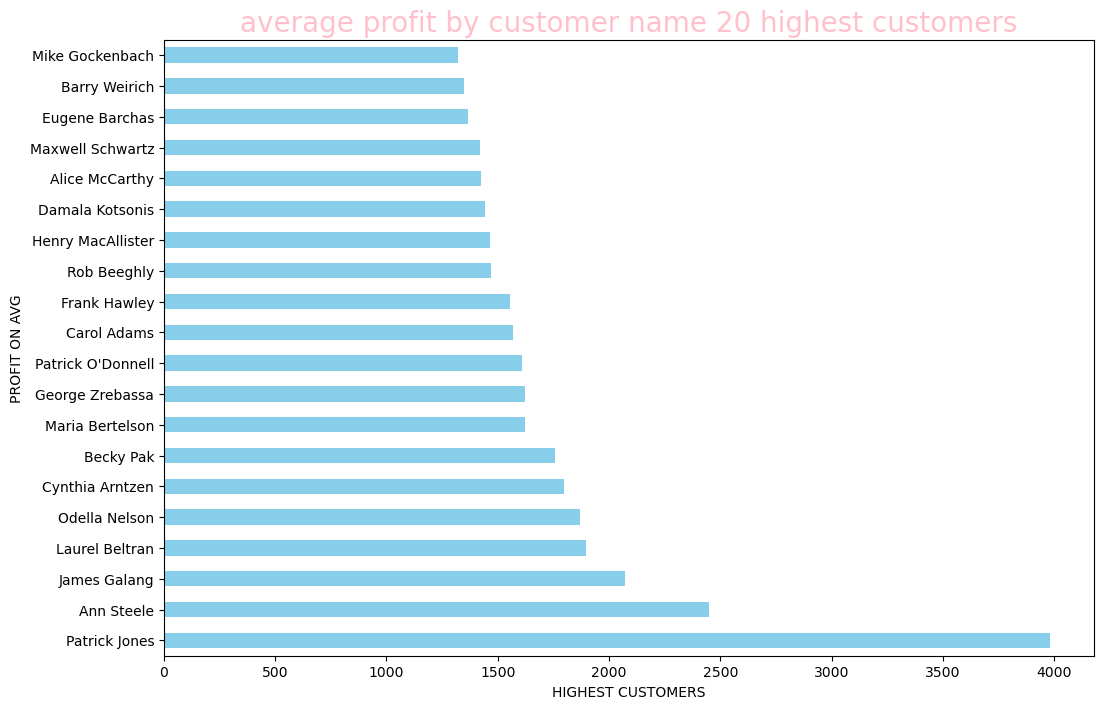

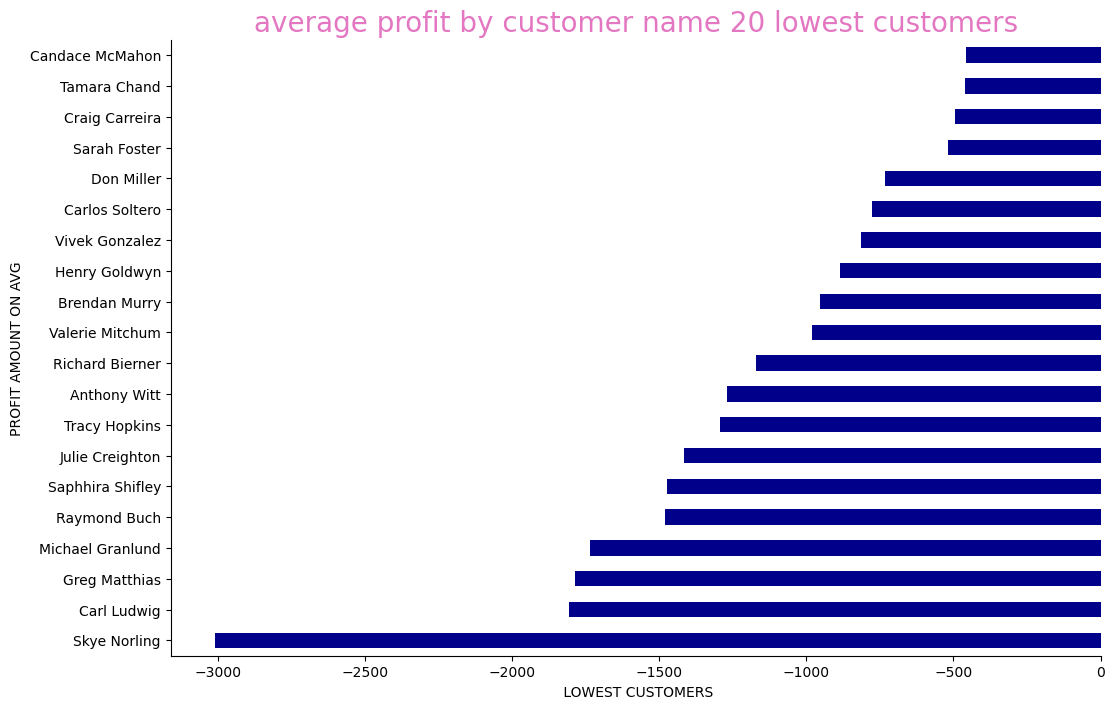

In [36]:
#average PROFIT by customer name
plt.figure(figsize=(12,8))
h2=df.groupby("Customer Name")["Profit"].mean().nlargest(20).plot(kind="barh", color="skyblue")
plt.title('average profit by customer name 20 highest customers',fontsize=20, color='pink')
plt.xlabel('HIGHEST CUSTOMERS')
plt.ylabel('PROFIT ON AVG')
plt.show()
plt.figure(figsize=(12,8))
l2=df.groupby("Customer Name")["Profit"].mean().nsmallest(20).plot(kind="barh", color="darkblue")
plt.title('average profit by customer name 20 lowest customers',fontsize=20, color='C66')
plt.xlabel(' LOWEST CUSTOMERS')
plt.ylabel('PROFIT AMOUNT ON AVG')
sns.despine()
plt.show()

<Axes: ylabel='Region'>

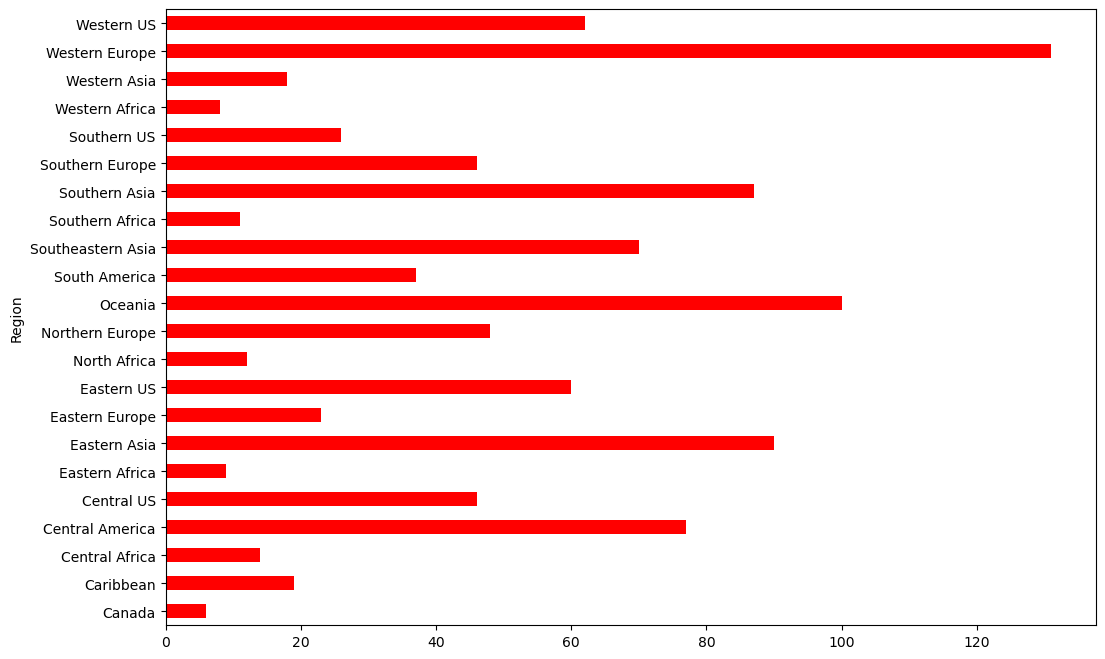

In [37]:
#count of order id by region
plt.figure(figsize=(12,8))
df.groupby("Region")["Order ID"].count().plot(kind="barh", color="red")

<Axes: xlabel='Month'>

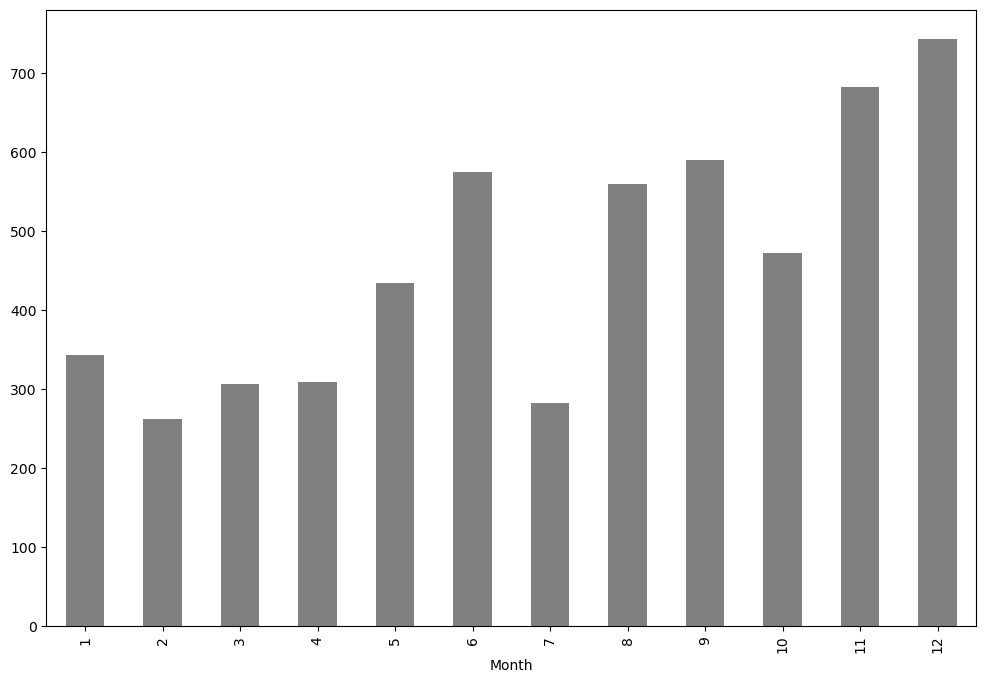

In [38]:
#sum of quantity by month
plt.figure(figsize=(12,8))
df.groupby("Month")["Quantity"].sum().plot(kind="bar", color="grey")

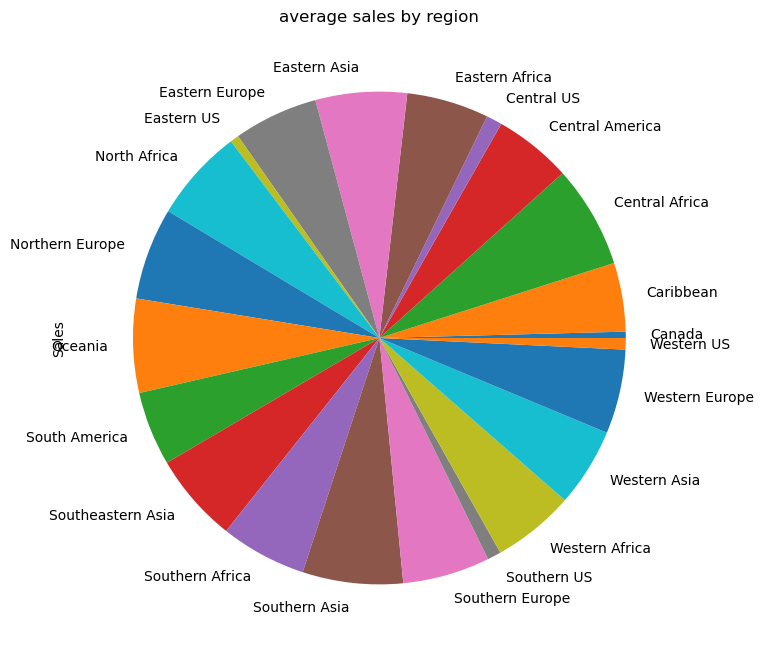

In [39]:
#average sales by region
plt.figure(figsize=(12,8))
df.groupby("Region")["Sales"].mean().plot(kind="pie")
plt.title("average sales by region")
plt.show()

## <span style="color:orange;"><h4>Q5.Product Performance</h4></u></span>

In [41]:
# The 10 best performing products inregards to sales were:
df.groupby('Product Name')['Sales'].sum().nlargest(10)

Product Name
Motorola Smart Phone, Full Size                             48542.52
Apple Smart Phone, Full Size                                42303.44
Cisco Smart Phone, Full Size                                41325.20
Nokia Smart Phone, Full Size                                27661.97
Samsung Smart Phone, Cordless                               25438.59
Hoover Stove, Red                                           23477.81
Motorola Smart Phone, with Caller ID                        23239.44
Harbour Creations Executive Leather Armchair, Adjustable    22145.80
Cisco Smart Phone, with Caller ID                           22047.89
Cisco Smart Phone, Cordless                                 21954.87
Name: Sales, dtype: float64

In [42]:
# The 10 worst performing products inregards to sales were:
df.groupby('Product Name')['Sales'].sum().nsmallest(10)

Product Name
Insertable Tab Indexes For Data Binders                                       1.91
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum    2.22
OIC #2 Pencils, Medium Soft                                                   3.01
Acco Hanging Data Binders                                                     3.05
Newell 323                                                                    3.36
Avery 487                                                                     3.69
Acco Translucent Poly Ring Binders                                            3.74
Cardinal Holdit Business Card Pockets                                         3.98
Eldon Image Series Desk Accessories, Burgundy                                 4.18
Ampad Gold Fibre Wirebound Steno Books, 6" x 9", Gregg Ruled                  4.41
Name: Sales, dtype: float64

In [43]:
#Impact of Discount 
dis=df.groupby('Discount')[['Sales','Profit']].mean()
dis

Sales       Profit
Discount                          
0.000     1847.844125   466.325071
0.002     1304.734000   289.531333
0.070     2162.240769   261.683077
0.100     2098.172574   364.276838
0.150     1768.004571   197.132857
0.170     2359.421923   238.945769
0.200      664.553421    68.723684
0.250     1853.752000  -120.944000
0.270     2147.647500   124.597500
0.300     1696.101111  -265.206667
0.350     1903.666000  -289.701000
0.370     1161.200000  -147.520000
0.400     1402.283529  -399.510000
0.470     1904.556667  -296.346667
0.500     1715.437222 -1158.853333
0.570     1854.930000 -1294.350000
0.600      771.125714  -727.964286
0.650     1824.140000 -1303.060000
0.700      501.113333  -517.394167
0.800       13.807500   -22.075000

## <span style="color:orange;"><h4>Q6.Shipping analysis</h4></u></span>

In [45]:
#Average Delivery Time
avg_dev=(pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days.mean()
print('Average Delivery Time in days:',avg_dev)

Average Delivery Time in days: 3.023


In [46]:
#Segment + Profit by Region 
df.groupby(['Segment','Region'])['Profit'].sum().unstack()

Region       Canada  Caribbean  Central Africa  Central America  Central US  \
Segment                                                                       
Consumer     103.02    3909.41         8053.92         12057.61     5782.82   
Corporate     84.60     802.46         1524.30          5954.03     -265.02   
Home Office   26.10     751.95           90.00          3730.31      158.22   

Region       Eastern Africa  Eastern Asia  Eastern Europe  Eastern US  \
Segment                                                                 
Consumer            2090.52      21529.69         3450.27      345.63   
Corporate            875.88      10230.89         5773.38      367.51   
Home Office         1336.32       6150.58         3004.80     1831.75   

Region       North Africa  ...  South America  Southeastern Asia  \
Segment                    ...                                     
Consumer          1951.20  ...        2521.13            6276.17   
Corporate         4142.70  ...        1115.79            3304.69   
Home Office       1322.52  ...        4086.66             980.94   

Region       Southern Africa  Southern Asia  Southern Europe  Southern US  \
Segment                                                                     
Consumer             1171.92       20538.59         10166.79      1161.84   
Corporate            2318.52       14107.95         10007.65        58.17   
Home Office          1385.88        2890.06           383.06       164.71   

Region       Western Africa  Western Asia  Western Europe  Western US  
Segment                                                                
Consumer            1072.32       6299.21        21477.07      191.43  
Corporate           1563.48       -155.90         9568.03      477.53  
Home Office        -1357.63       -880.96         1738.30     1789.38  

[3 rows x 22 columns]

In [47]:
#Filter HighDiscount Orders
dis=df[df['Discount'] > 0.3]
dis[:5]

Row ID                  Order ID Order Date  Ship Date       Ship Mode  \
65   32637  CA-2015-AS10045140-42007 2015-01-03 2015-01-05     First Class   
73   21209   IN-2015-LA1678059-42242 2015-08-26 2015-08-27     First Class   
76   33130  CA-2015-AS10045140-42218 2015-08-02 2015-08-08  Standard Class   
83   40425  US-2015-AS10045140-42252 2015-09-05 2015-09-06     First Class   
93   32639  CA-2015-AS10045140-42007 2015-01-03 2015-01-05     First Class   

     Customer ID    Customer Name    Segment          City             State  \
65  AS-100451408   Aaron Smayling  Corporate  Jacksonville    North Carolina   
73    LA-1678059  Laura Armstrong  Corporate     Palembang  Sumatera Selatan   
76  AS-100451402   Aaron Smayling  Corporate        Austin             Texas   
83  AS-100451404   Aaron Smayling  Corporate       Redmond            Oregon   
93  AS-100451408   Aaron Smayling  Corporate  Jacksonville    North Carolina   

    ... Sub-Category                                       Product Name  \
65  ...     Machines  Cisco CP-7937G Unified IP Conference Station P...   
73  ...       Tables        Bevis Conference Table, with Bottom Storage   
76  ...     Machines                        Bady BDG101FRU Card Printer   
83  ...      Binders        Avery Trapezoid Extra Heavy Duty 4" Binders   
93  ...      Binders  Avery Recycled Flexi-View Covers for Binding S...   

      Sales Quantity Discount  Profit Shipping Cost  Order Priority  \
65   695.70        2     0.50  -27.83        160.19            High   
73  3427.15        7     0.47 -452.81        586.57            High   
76  1439.98        3     0.40 -264.00        103.62          Medium   
83    88.07        7     0.70  -58.72         23.88            High   
93    28.85        6     0.70  -21.16          5.35            High   

    YearMonth  Month  
65    2015-01      1  
73    2015-08      8  
76    2015-08      8  
83    2015-09      9  
93    2015-01      1  

[5 rows x 25 columns]

In [48]:
#extra added learning operations 

In [49]:
len(dis)

74

In [50]:
df['Shipping Cost'].astype(int)[:10]

0     40
1    923
2    915
3    910
4    903
5    897
6    894
7    878
8     25
9     11
Name: Shipping Cost, dtype: int32

In [ ]:
PROFIT_MONTH_MARKET=df.groupby(['YEARMONTH','MARKET'])['PROFIT'].sum().sort_values(ascending=False).unstack()
display(PROFIT_MONTH_MARKET)

In [ ]:
unique_products = df[(df['PROFIT'] > 3000) | (df['SALES'] > 7000)]['PRODUCT'].unique()  
print(unique_products)  # Returns an array of unique product names

In [ ]:
# Group by 'PRODUCT NAME' and calculate sum of 'SALES' and 'PROFIT'
product_performance = df.groupby('PRODUCT NAME')[['SALES', 'PROFIT']].sum().reset_index()

# Result will show each product with its total sales and profit
print(product_performance)

In [ ]:
# WHICH IS BEST PERFORMING PRODUCT IN REGARDS TO SALES AND PROFIT
best_products = (
    df.groupby('PRODUCT NAME', as_index=False)[['SALES', 'PROFIT']].sum()
      .sort_values(by=['PROFIT', 'SALES'], ascending=False)
)

In [ ]:
# COUNTRY WITH THE HIGHEST NUMBER OF CLIENTS
high = df['REGION'].value_counts().nlargest(15).reset_index()

# COUNTRY WITH THE LOWEST NUMBER OF CLIENTS
low = df['REGION'].value_counts().nsmallest(15).reset_index()

# Combine side by side (rename columns for clarity)
combined = pd.concat(
    [high.rename(columns={'count': 'Top 15 Regions'}), 
     low.rename(columns={'count': 'Bottom 15 Regions'})], 
    axis=1
)

display(combined)

<div  style="background-color:lightgray; padding:20px; text-align:left; border-radius:10px;">
<b>MY FINDINGS :</b>
<P><b>1. Data Cleaning and Preparation:</b></br>
Load the dataset into your analysis tool of choice (Python).
Check for and handle missing or duplicate data.
Ensure data types are appropriate for analysis.
</P>
<p><b>2. Descriptive Statistics:</b></br>
Calculate summary statistics for numerical columns (e.g., mean, median, standard deviation of Sales
and Profit).
Determine the distribution of categorical variables (e.g., count of orders by Region, Category).
</p>

## <span style="color:orange;"><u><h2>THANK YOU ðŸ˜ŽðŸŽ‰ BYE ðŸ˜ŽðŸŽ‰</h2></u></span>